<a href="https://colab.research.google.com/github/mmaghajani/RL-up-running/blob/main/bandit_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### epsilon greedy


In [2]:
NUM_TRIALS = 2000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [7]:
class Bandit:
  def __init__(self, p):
    self.p = p
    self.p_estimate = 0.
    self.N = 0

  def pull(self):
    return np.random.random() < self.p

  def update(self, x):
    self.N += 1.
    self.p_estimate = ((self.N - 1)*self.p_estimate + x ) / self.N

In [10]:
def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  rewards = np.zeros(NUM_TRIALS)
  num_times_explored = 0
  num_times_exploited = 0
  num_optimal = 0
  optimal_j = np.argmax([bandit.p for bandit in bandits])
  print("optimal j: ", optimal_j)

  for i in range(NUM_TRIALS):

    if np.random.random() < EPS:
      num_times_explored += 1 
      j = np.random.randint(len(bandits))
    else:
      num_times_exploited += 1
      j = np.argmax([b.p_estimate for b in bandits])

    if j == optimal_j:
      num_optimal += 1

    x = bandits[j].pull()

    rewards[i] = x

    bandits[j].update(x)

  for b in bandits:
        print("mean estimate:", b.p_estimate)

  # print total reward
  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num_times_explored:", num_times_explored)
  print("num_times_exploited:", num_times_exploited)
  print("num times selected optimal bandit:", num_optimal)

  
  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

optimal j:  2
mean estimate: 0.19444444444444445
mean estimate: 0.5802469135802469
mean estimate: 0.7536545749864644
total reward earned: 1453.0
overall win rate: 0.7265
num_times_explored: 187
num_times_exploited: 1813
num times selected optimal bandit: 1847


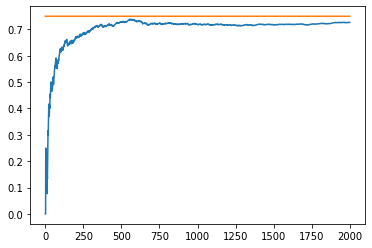

In [13]:
experiment()

### optimistic greedy

In [ ]:
NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [ ]:
class Bandit:
  def __init__(self, p):
    self.p = p
    self.p_estimate = 3.
    self.N = 0

  def pull(self):
    return np.random.random() < self.p

  def update(self, x):
    self.N += 1.
    self.p_estimate = ((self.N - 1)*self.p_estimate + x ) / self.N

In [ ]:
def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  rewards = np.zeros(NUM_TRIALS)

  for i in range(NUM_TRIALS):

    best_win = np.argmax([b.p_estimate for b in bandits])
    x = bandits[best_win].pull()
    rewards[i] = x
    bandits[best_win].update(x)

  for b in bandits:
        print("mean estimate:", b.p_estimate)

  # print total reward
  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit:", [b.N for b in bandits])

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.ylim([0, 1])
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

optimal j:  2
mean estimate: 0.2093023255813954
mean estimate: 0.5384615384615384
mean estimate: 0.7555670636975669
total reward earned: 1482.0
overall win rate: 0.741
num_times_explored: 104
num_times_exploited: 1896
num times selected optimal bandit: 1931


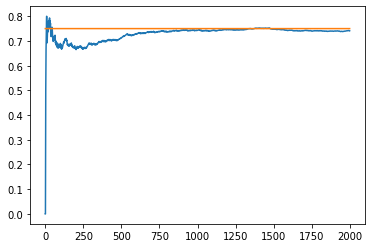

In [48]:
experiment()

### optimistic epsilon greedy

In [30]:
NUM_TRIALS = 2000
EPS = 0.05
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [31]:
class Bandit:
  def __init__(self, p):
    self.p = p
    self.p_estimate = 3.
    self.N = 0

  def pull(self):
    return np.random.random() < self.p

  def update(self, x):
    self.N += 1.
    self.p_estimate = ((self.N - 1)*self.p_estimate + x ) / self.N

In [32]:
def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  rewards = np.zeros(NUM_TRIALS)
  num_times_explored = 0
  num_times_exploited = 0
  num_optimal = 0
  optimal_j = np.argmax([bandit.p for bandit in bandits])
  print("optimal j: ", optimal_j)

  for i in range(NUM_TRIALS):

    if np.random.random() < EPS:
      num_times_explored += 1 
      j = np.random.randint(len(bandits))
    else:
      num_times_exploited += 1
      j = np.argmax([b.p_estimate for b in bandits])

    if j == optimal_j:
      num_optimal += 1

    x = bandits[j].pull()

    rewards[i] = x

    bandits[j].update(x)

  for b in bandits:
        print("mean estimate:", b.p_estimate)

  # print total reward
  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num_times_explored:", num_times_explored)
  print("num_times_exploited:", num_times_exploited)
  print("num times selected optimal bandit:", num_optimal)

  
  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

optimal j:  2
mean estimate: 0.3
mean estimate: 0.6052631578947368
mean estimate: 0.75879917184265
total reward earned: 1498.0
overall win rate: 0.749
num_times_explored: 96
num_times_exploited: 1904
num times selected optimal bandit: 1932


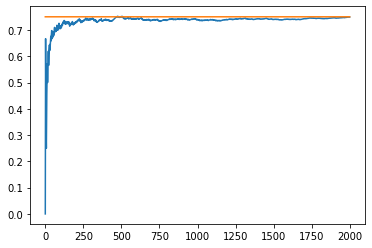

In [43]:
experiment()